**BILO BAGE BILIYAN DA KI KAREGI BAGE BAGE BILIYAN DA KI KAREGI**
<BR>ANS: *** *********

**Add all imports here**
**DEKH LENA SAARE IMPORTS SAARE YAHAN DAALNE HAIN VVVVVVVVVVVVVIMP**

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **Loading the dataset**

In [ ]:
uploaded = files.upload()


Saving cardio_train.csv to cardio_train (1).csv


In [ ]:
data = pd.read_csv("cardio_train.csv")
data.drop("id",axis=1,inplace=True)
display(data)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
0         0       1  30   90.000000       0  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
...     ...     ...  ..         ...     ...  
69995     0       1  40   93.333333       0  
69996     0       1  50  106.666667       1  
69997     1       0  90  120.000000       1  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[70000 rows x 14 columns]

In [ ]:
features=["ap_hi","ap_lo","PP","MAP"]
for i in features:
  data = data.drop(data[data[i]<0].index)
  data = data.drop(data[data[i]>500].index)
print(data.shape)

(68727, 14)


# **Exploratory Data Analysis**

**Multi-variate Analysis**

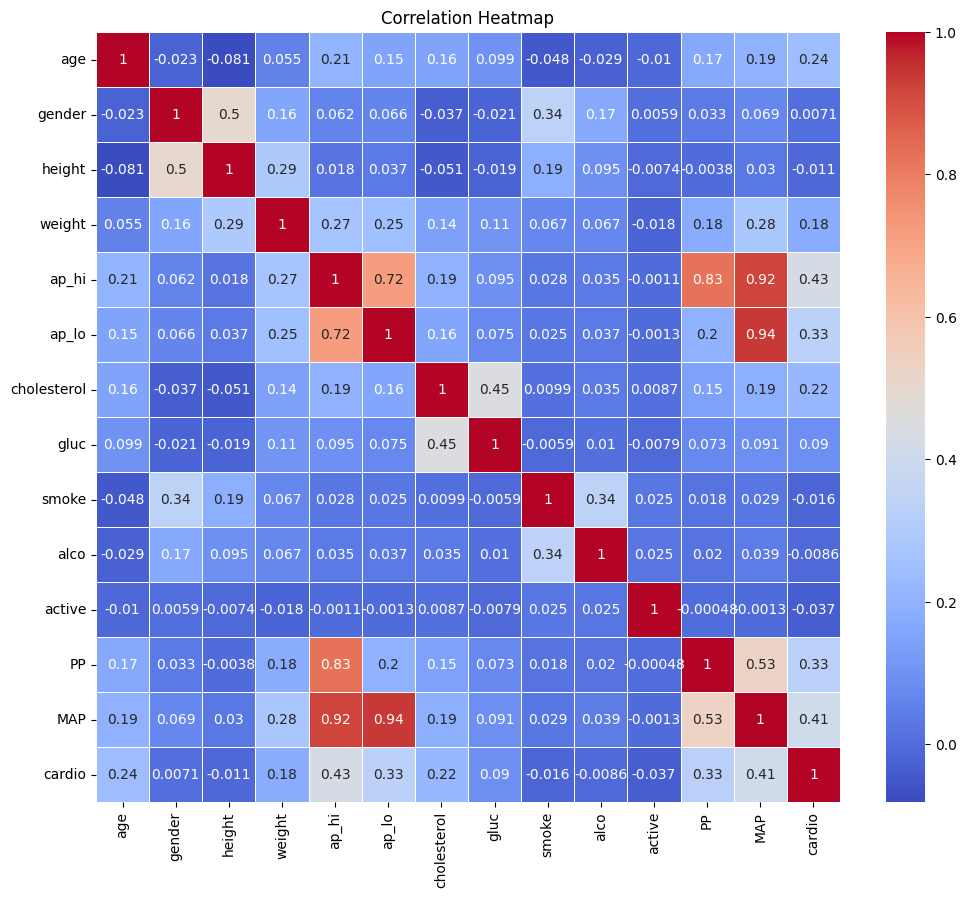

In [ ]:
# Corelation HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


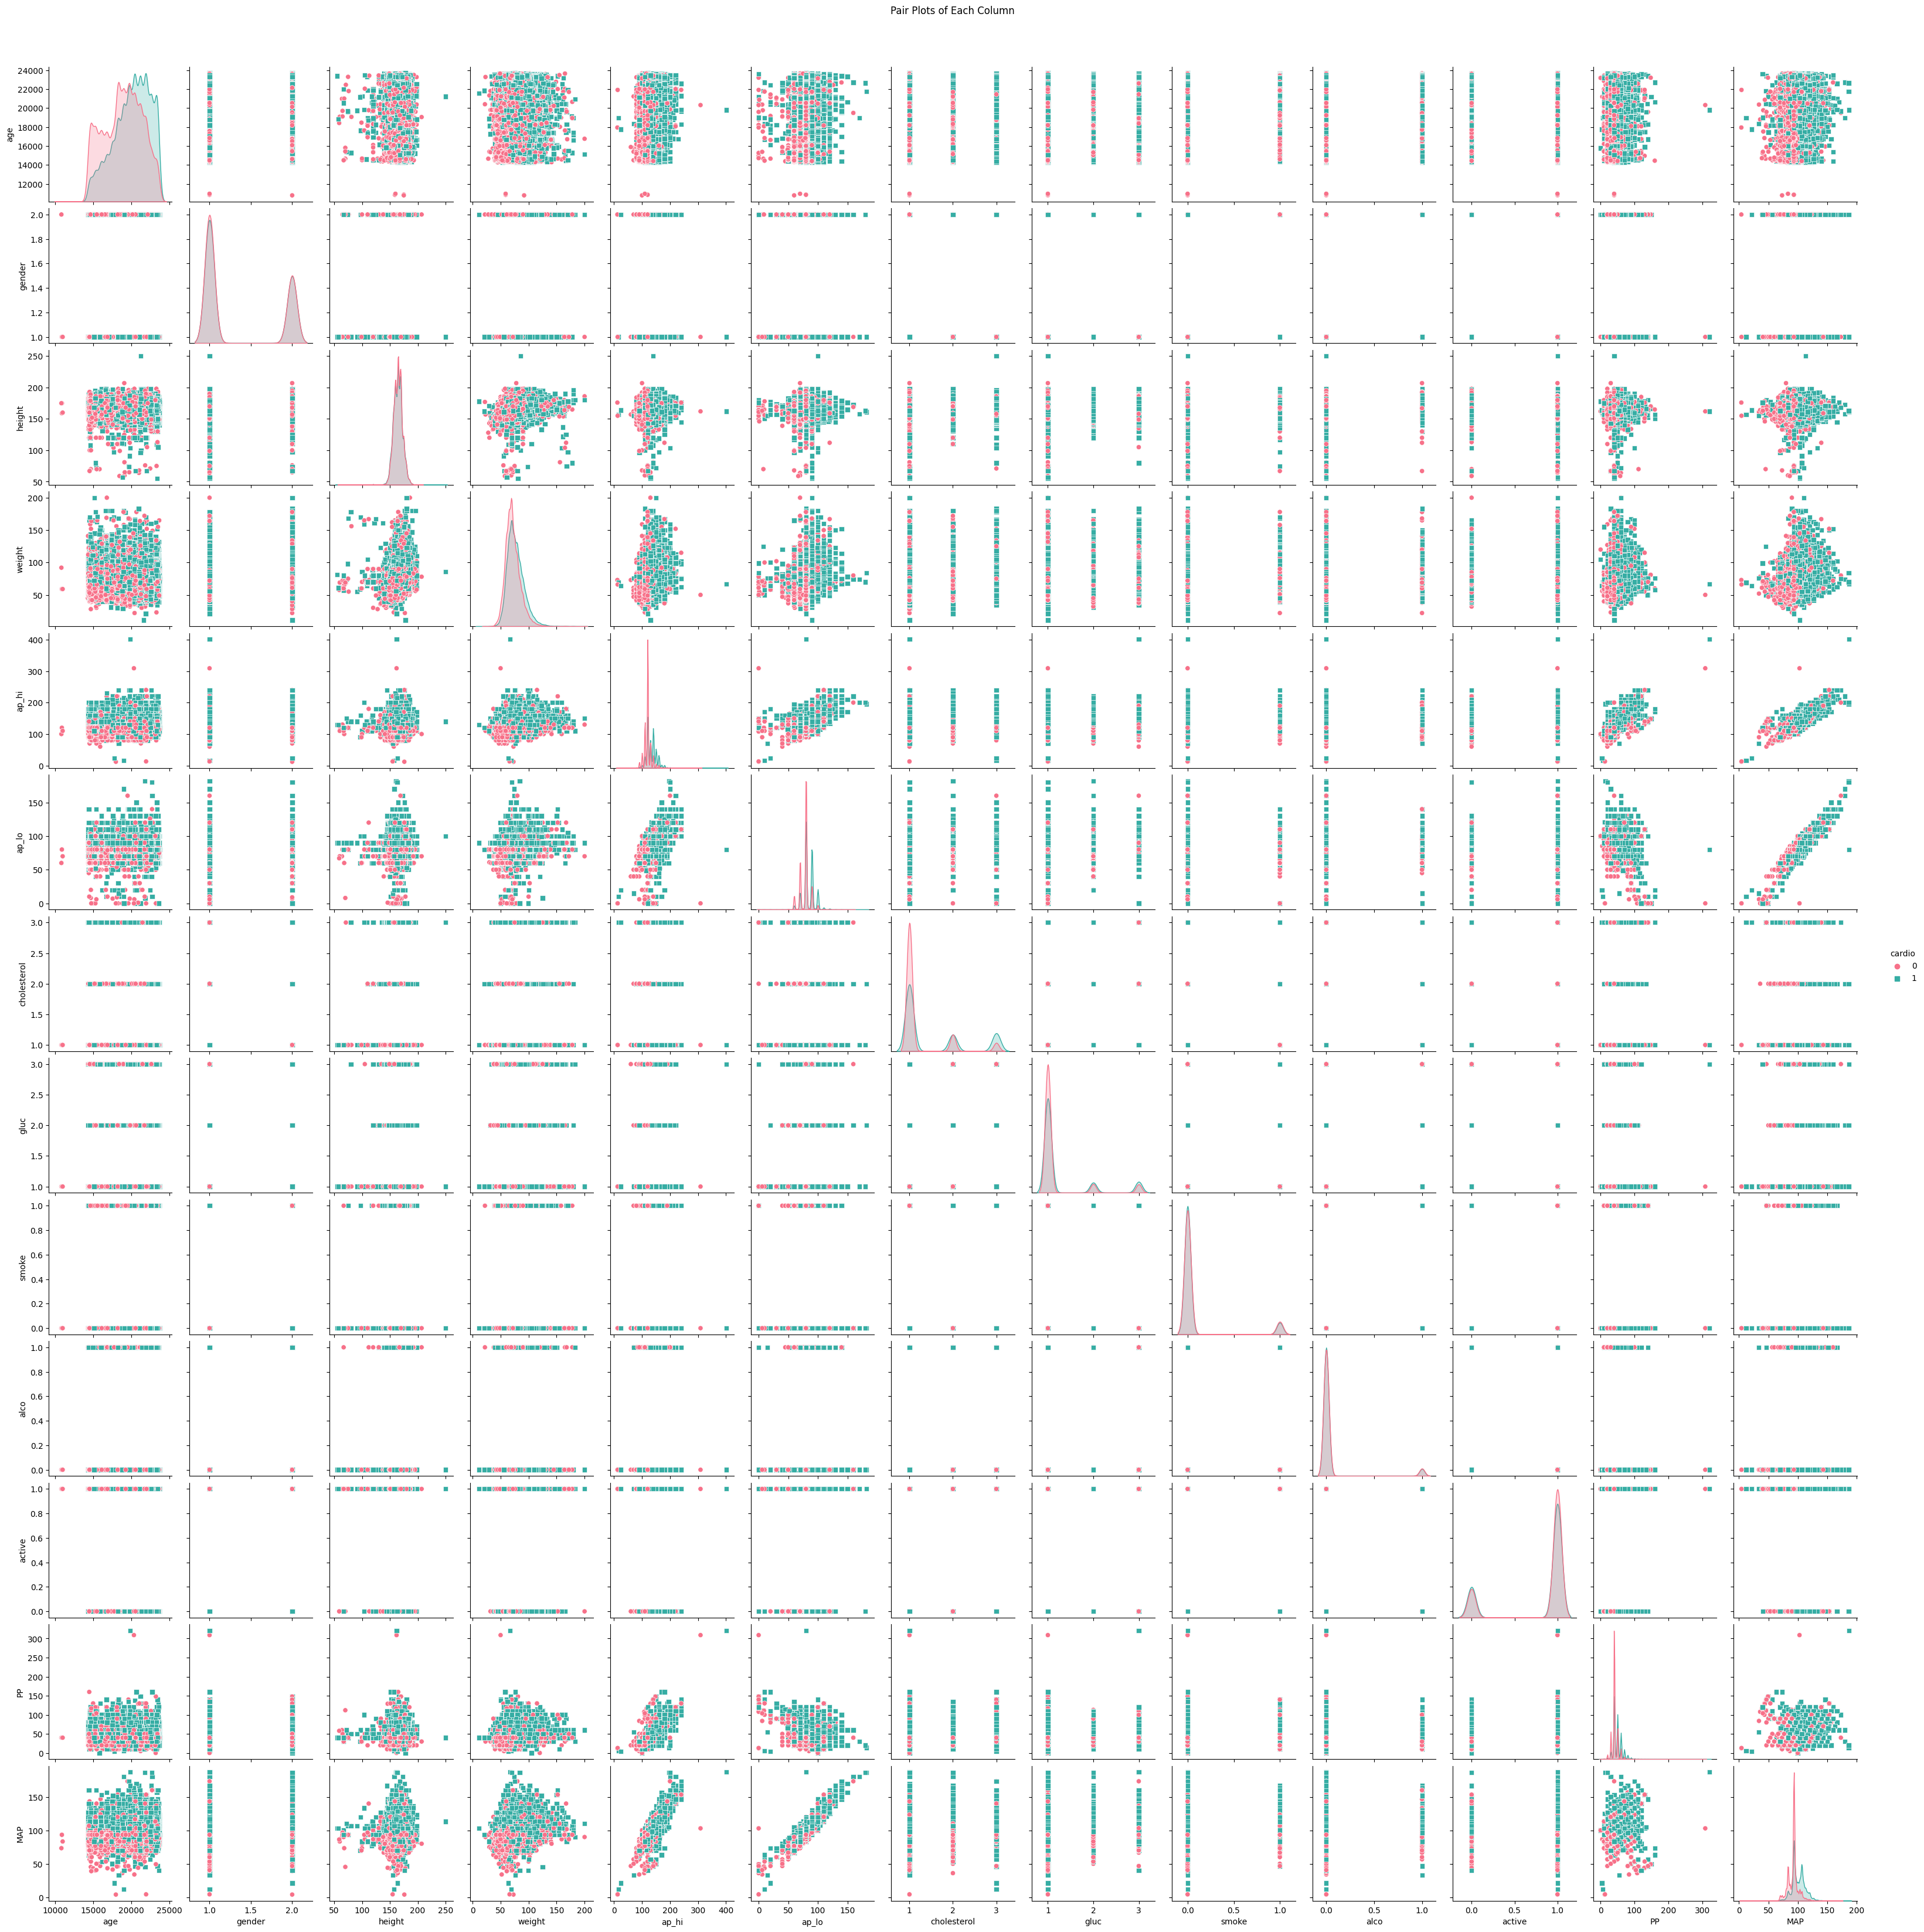

In [ ]:
sns.pairplot(data, diag_kind='kde', hue='cardio', palette='husl', markers=['o', 's'])
plt.suptitle("Pair Plots of Each Column", y=1.02)
plt.show()

**Uni-Variate Analysis**

Box-Plots

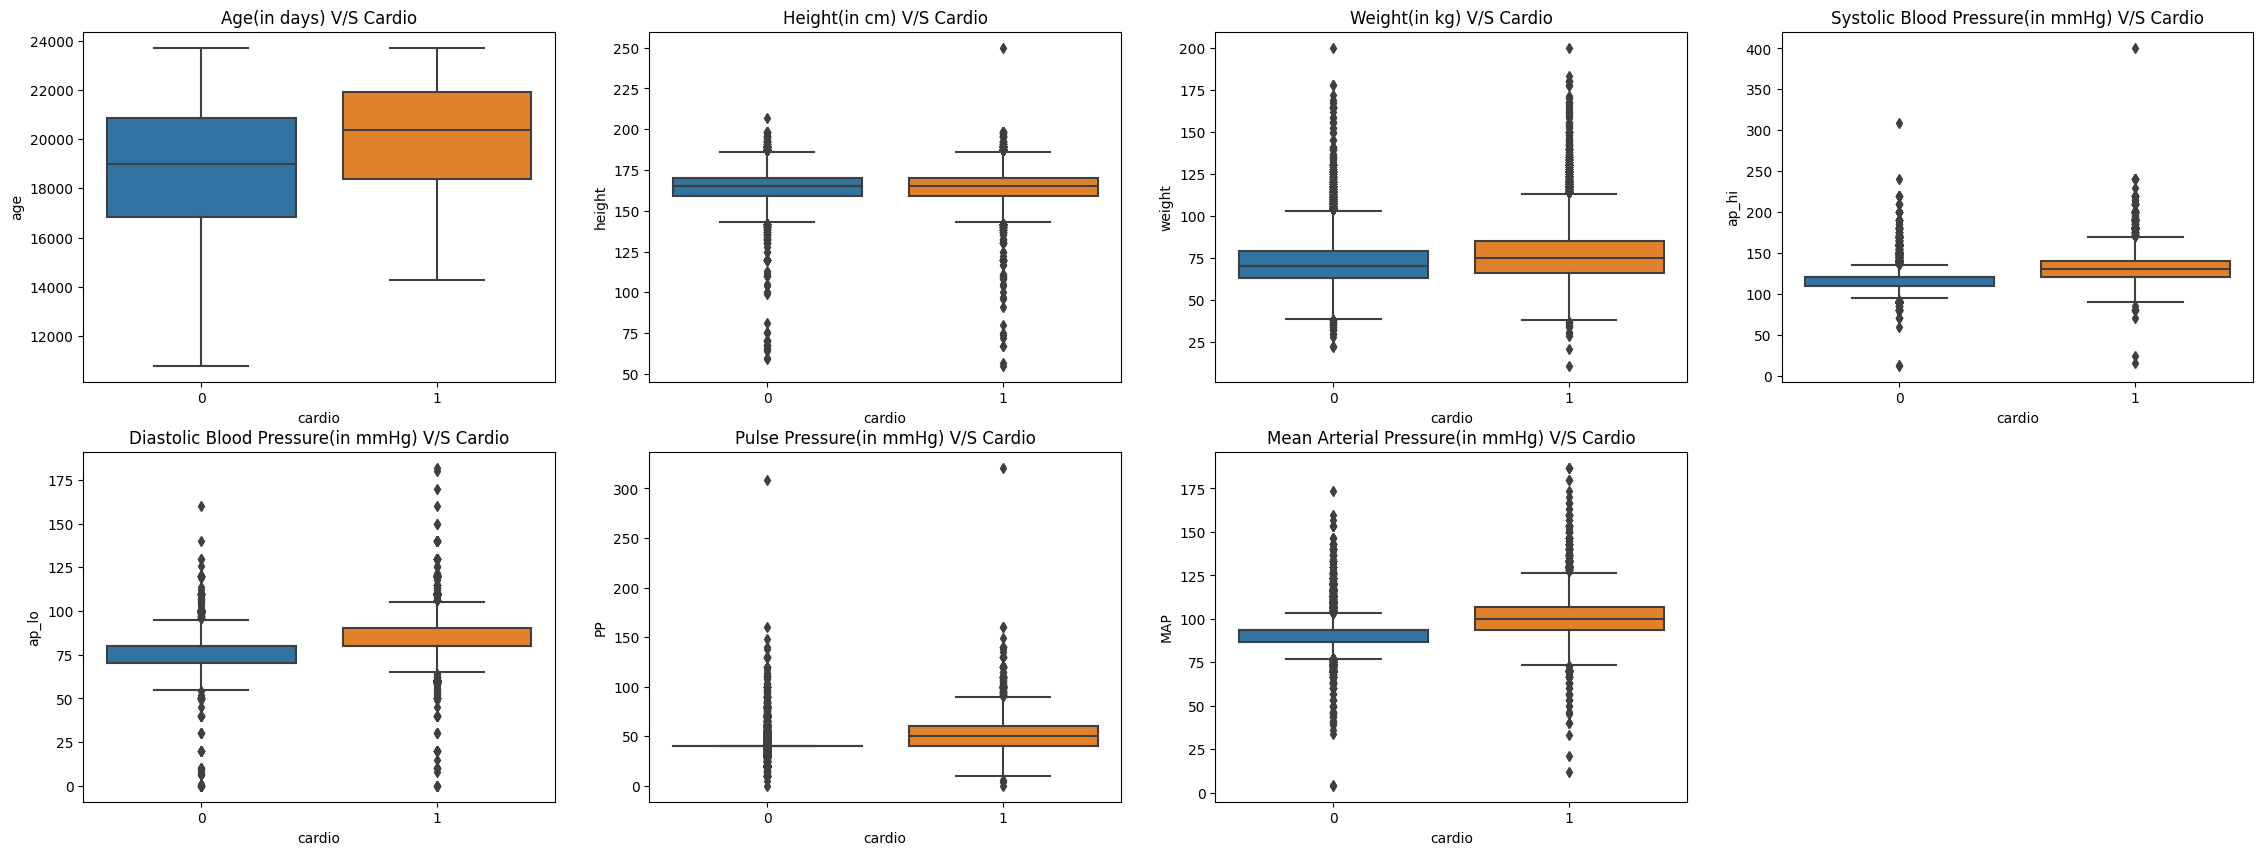

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(28, 10))
sns.boxplot(ax=axes[0,0],x="cardio",y="age",data=data)
sns.boxplot(ax=axes[0,1],x="cardio",y="height",data=data)
sns.boxplot(ax=axes[0,2],x="cardio",y="weight",data=data)
sns.boxplot(ax=axes[0,3],x="cardio",y="ap_hi",data=data)
sns.boxplot(ax=axes[1,0],x="cardio",y="ap_lo",data=data)
sns.boxplot(ax=axes[1,1],x="cardio",y="PP",data=data)
sns.boxplot(ax=axes[1,2],x="cardio",y="MAP",data=data)
axes[0,0].set_title("Age(in days) V/S Cardio")
axes[0,1].set_title("Height(in cm) V/S Cardio")
axes[0,2].set_title("Weight(in kg) V/S Cardio")
axes[0,3].set_title("Systolic Blood Pressure(in mmHg) V/S Cardio")
axes[1,0].set_title("Diastolic Blood Pressure(in mmHg) V/S Cardio")
axes[1,1].set_title("Pulse Pressure(in mmHg) V/S Cardio")
axes[1,2].set_title("Mean Arterial Pressure(in mmHg) V/S Cardio")
fig.delaxes(axes[1,3])
plt.show()

**People With CVD**

### **Histograms**

**Combined Histograms for the report**

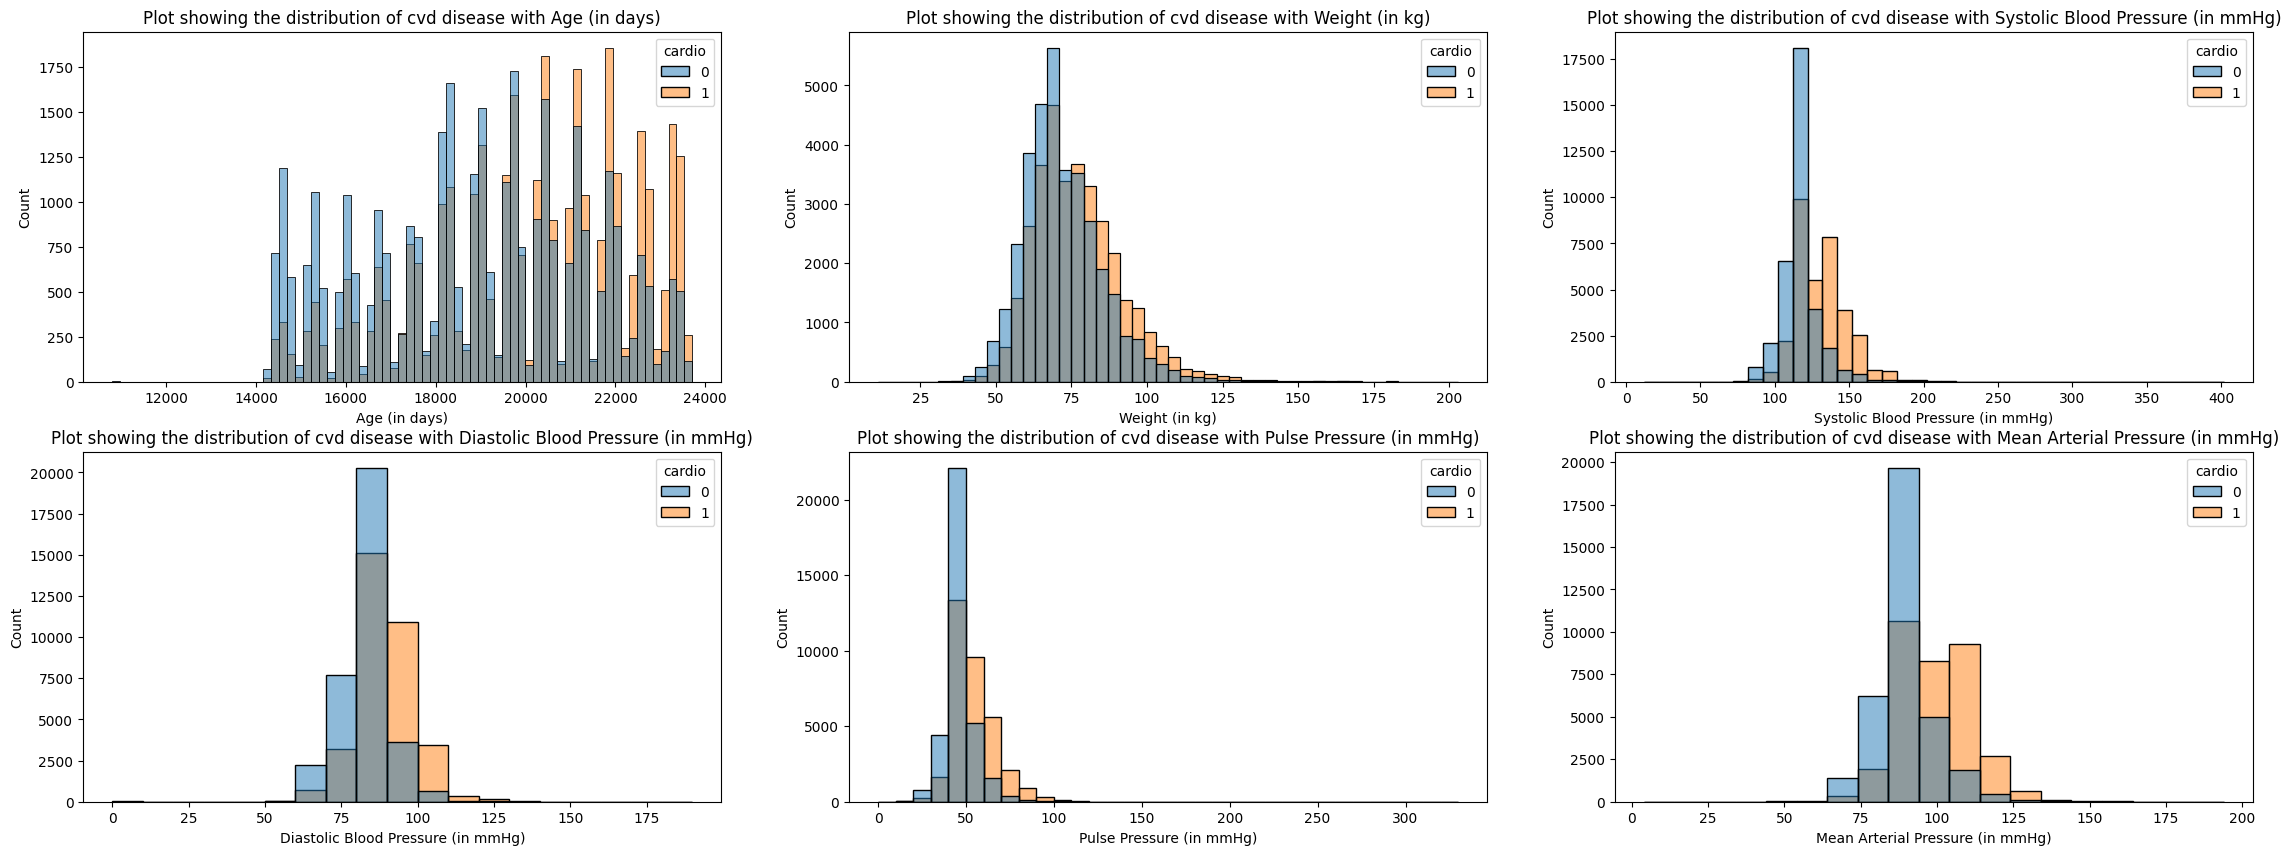

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(28, 10))
sns.histplot(ax=axes[0,0],x="age",hue="cardio",data=data)
axes[0,0].set_xlabel("Age (in days)")
axes[0,0].set_title("Plot showing the distribution of cvd disease with Age (in days)")
sns.histplot(ax=axes[0,1],x="weight",hue="cardio",data=data,binwidth=4.0)
axes[0,1].set_xlabel("Weight (in kg)")
axes[0,1].set_title("Plot showing the distribution of cvd disease with Weight (in kg)")
sns.histplot(ax=axes[0,2],x="ap_hi",hue="cardio",data=data,binwidth=10.0)
axes[0,2].set_xlabel("Systolic Blood Pressure (in mmHg)")
axes[0,2].set_title("Plot showing the distribution of cvd disease with Systolic Blood Pressure (in mmHg)")
sns.histplot(ax=axes[1,0],x="ap_lo",hue="cardio",data=data,binwidth=10.0)
axes[1,0].set_xlabel("Diastolic Blood Pressure (in mmHg)")
axes[1,0].set_title("Plot showing the distribution of cvd disease with Diastolic Blood Pressure (in mmHg)")
sns.histplot(ax=axes[1,1],x="PP",hue="cardio",data=data,binwidth=10.0)
axes[1,1].set_xlabel("Pulse Pressure (in mmHg)")
axes[1,1].set_title("Plot showing the distribution of cvd disease with Pulse Pressure (in mmHg)")
sns.histplot(ax=axes[1,2],x="MAP",hue="cardio",data=data,binwidth=10.0)
axes[1,2].set_xlabel("Mean Arterial Pressure (in mmHg)")
axes[1,2].set_title("Plot showing the distribution of cvd disease with Mean Arterial Pressure (in mmHg)")
plt.figure(dpi=100)
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different age brackets.

<Figure size 640x480 with 0 Axes>

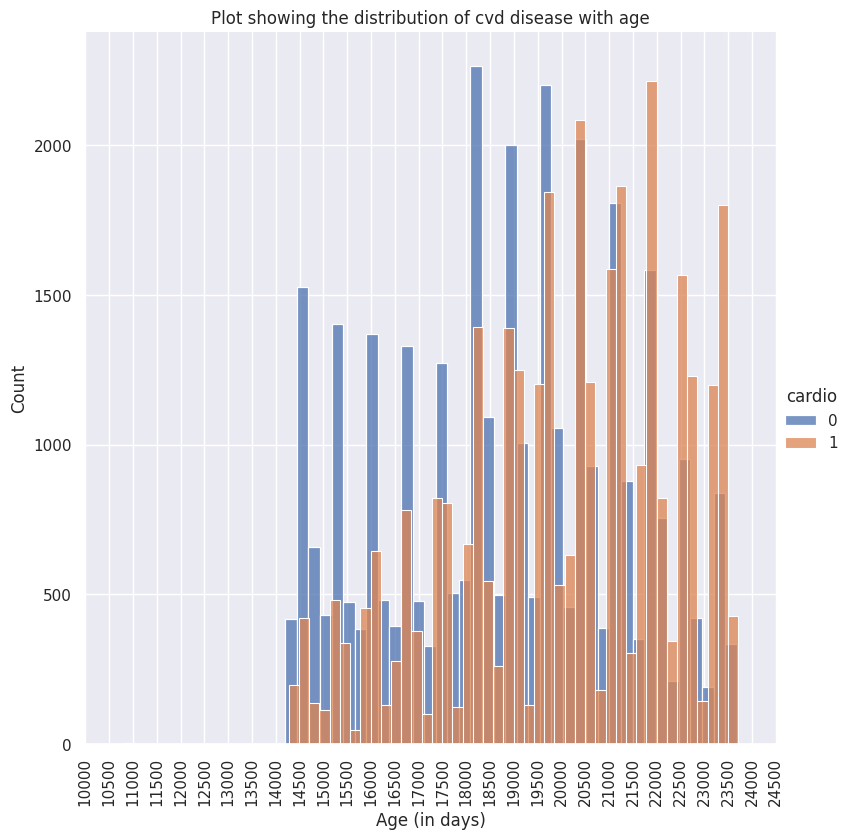

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'age').add_legend()
plt.title("Plot showing the distribution of cvd disease with age")
plt.xticks(rotation=90)
plt.xticks(np.arange(10000,25000,500))
plt.xlabel("Age (in days)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different height brackets.

<Figure size 640x480 with 0 Axes>

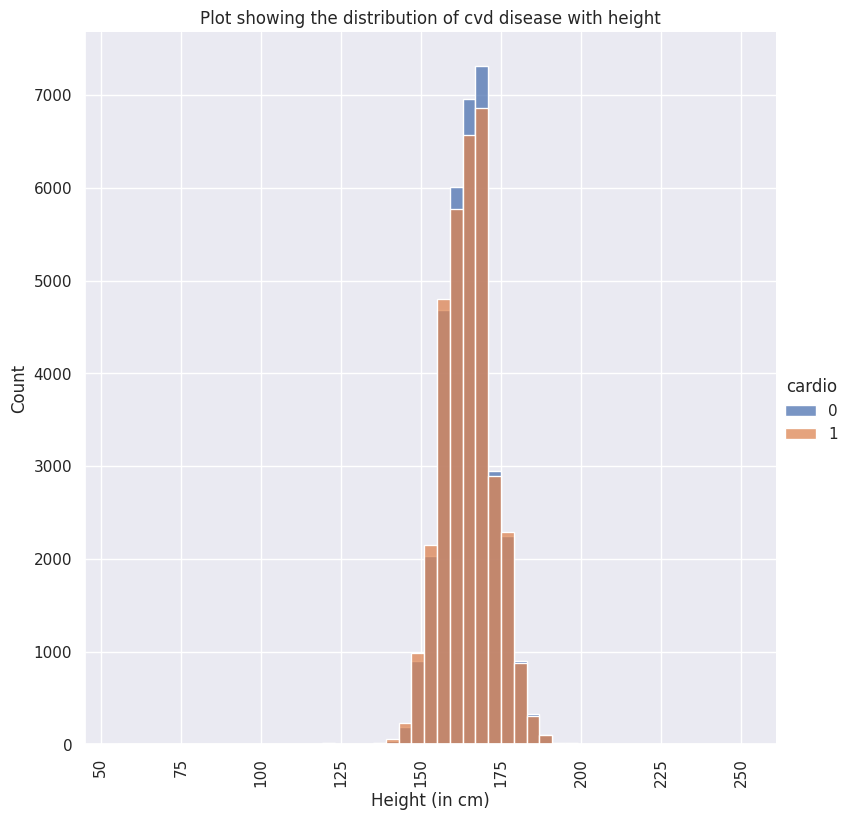

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'height',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with height")
plt.xticks(rotation=90)
plt.xlabel("Height (in cm)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different weight brackets.

<Figure size 640x480 with 0 Axes>

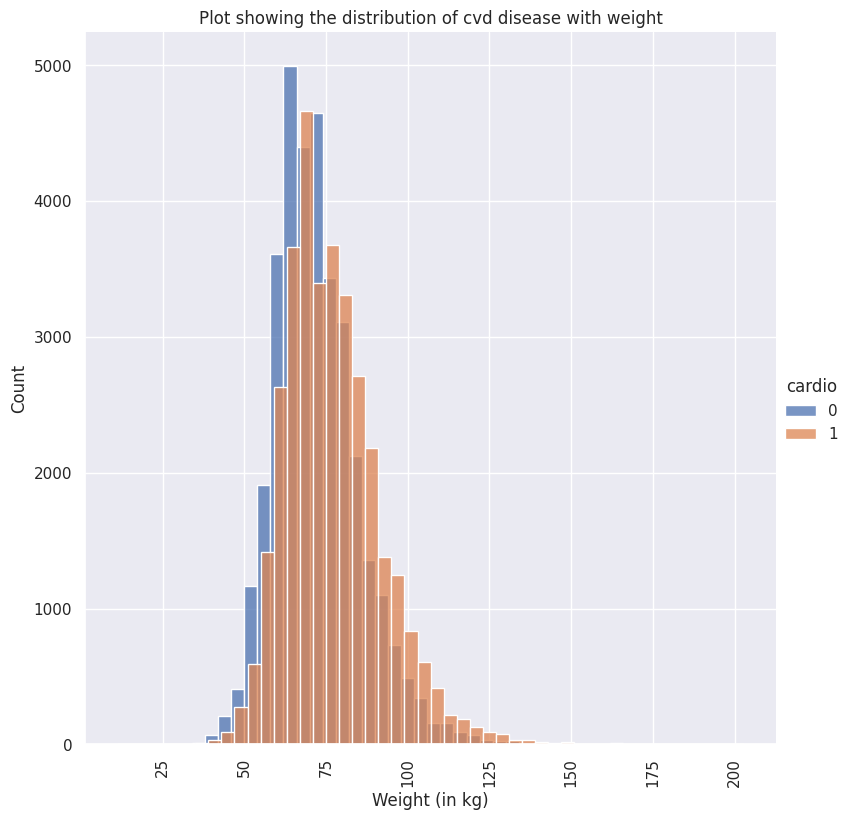

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'weight',binwidth=4.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with weight")
plt.xticks(rotation=90)
plt.xlabel("Weight (in kg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different systolic blood pressure brackets.


In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'ap_hi',binwidth=10.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with systolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,350,20))
plt.yticks(np.arange(0,18500,500))
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.show()

NameError: ignored

Histogram showing relative frequencies of the people with and without CVD,in different diastolic blood pressure brackets.


<Figure size 640x480 with 0 Axes>

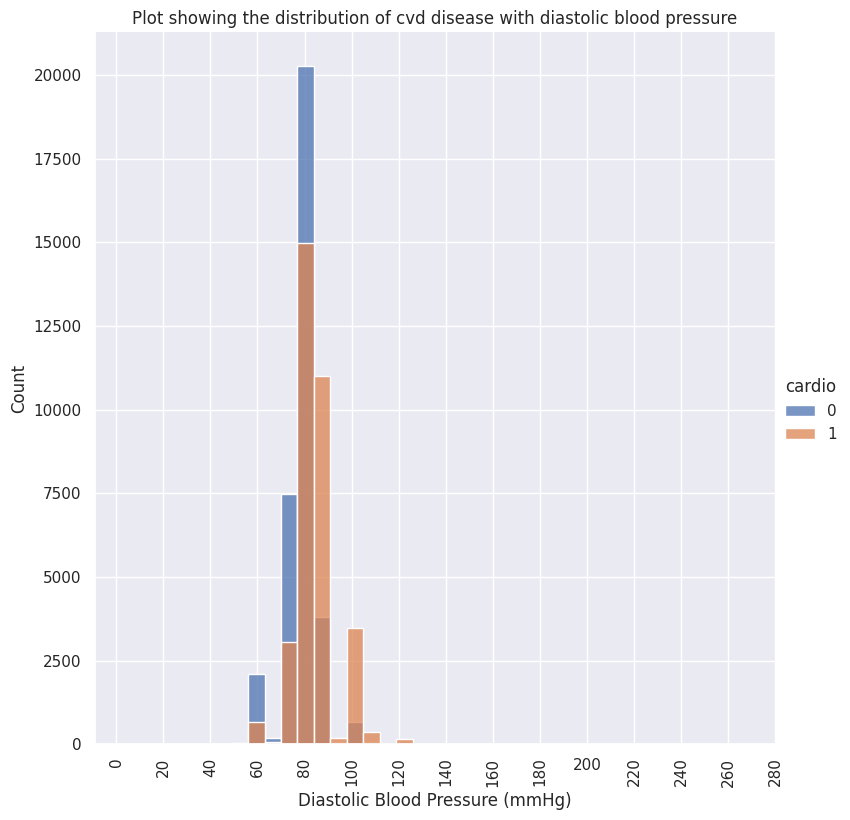

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'ap_lo',binwidth=7.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with diastolic blood pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,300,20))
# plt.yticks(np.arange(0,18500,500))
plt.xlabel("Diastolic Blood Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Pulse Pressure

<Figure size 640x480 with 0 Axes>

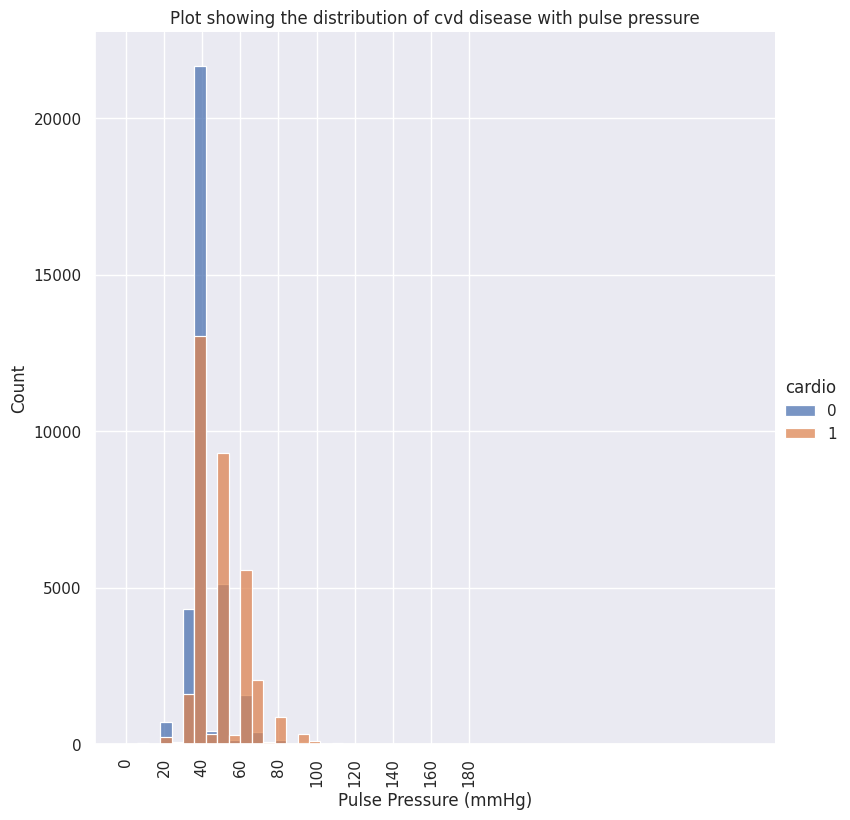

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'PP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with pulse pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Pulse Pressure (mmHg)")
plt.show()

Histogram showing relative frequencies of the people with and without CVD,in different ranges of Mean Arterial Pressure (MAP)

<Figure size 640x480 with 0 Axes>

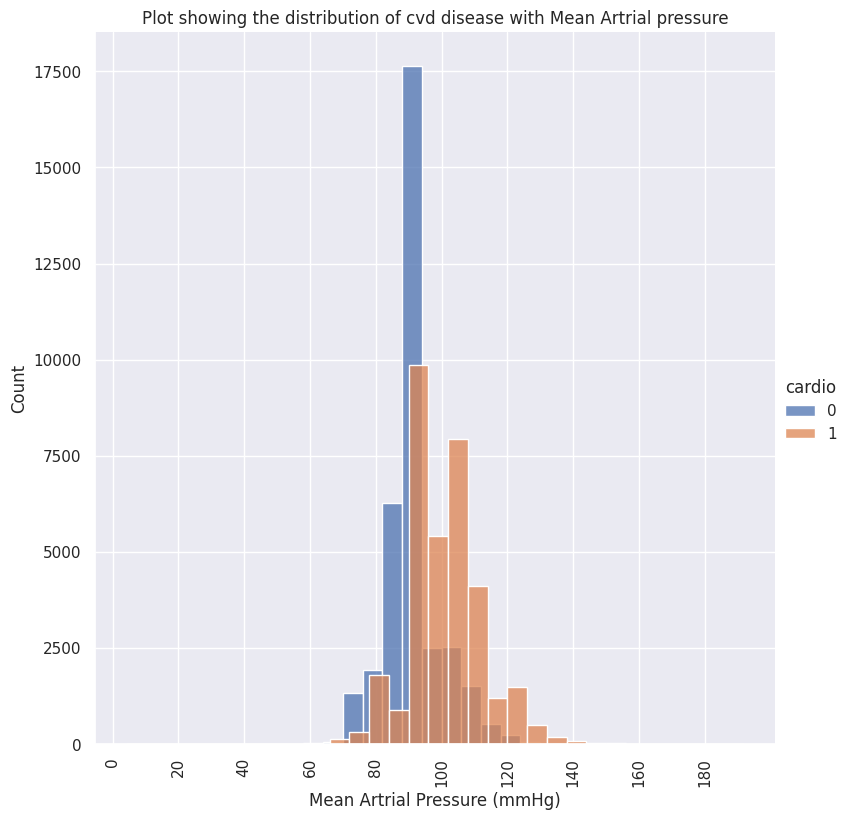

In [ ]:
sns.set(font_scale=1.0)
plt.figure(dpi=100)
sns.FacetGrid(data,hue="cardio",height=8).map(sns.histplot,'MAP',binwidth=6.0).add_legend()
plt.title("Plot showing the distribution of cvd disease with Mean Artrial pressure")
plt.xticks(rotation=90)
plt.xticks(np.arange(0,200,20))
plt.xlabel("Mean Artrial Pressure (mmHg)")
plt.show()

### **Pie-Charts**

**Combined Pie-Charts for Report**

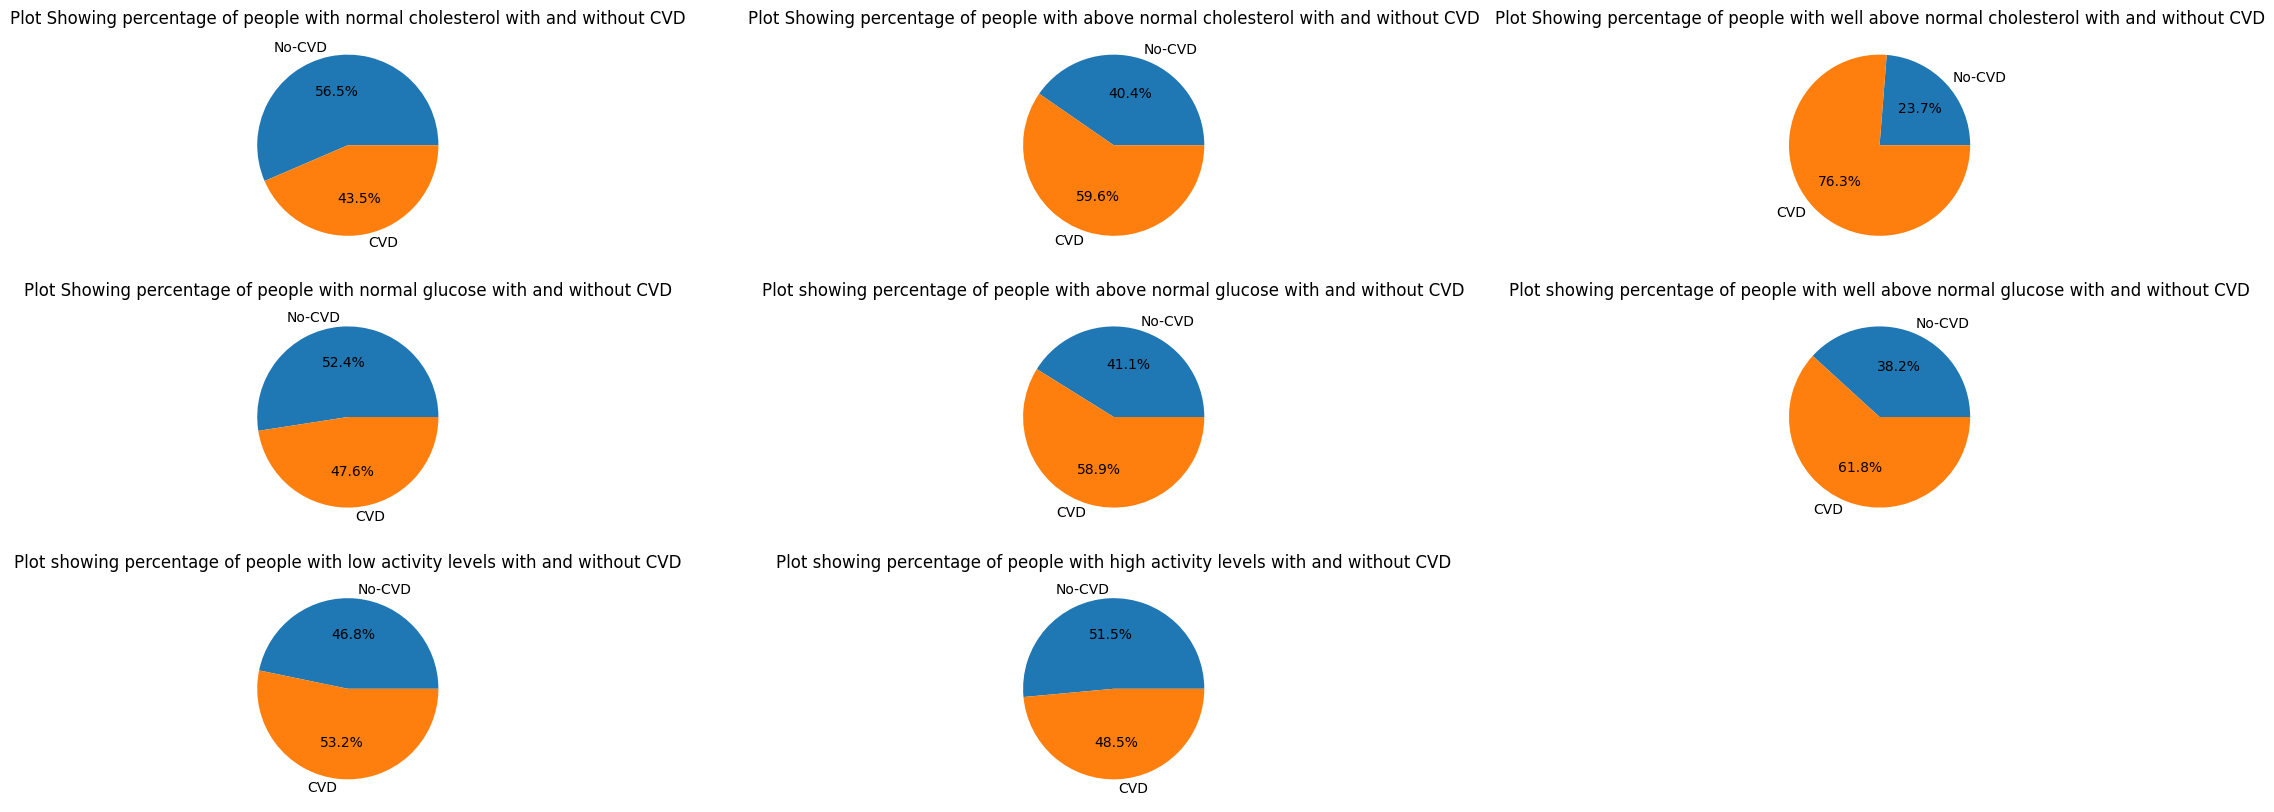

In [ ]:
CVD=["No-CVD","CVD"]

count_no_cvd_cholesterol_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
count_no_cvd_cholesterol_above_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
count_no_cvd_cholesterol_well_above_normal = [len(data[(data['cardio'] == 0) & (data['cholesterol'] ==3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]

count_no_cvd_glucose_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
count_no_cvd_glucose_above_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
count_no_cvd_glucose_well_above_normal = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]


count_no_cvd_less_activity = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
count_no_cvd_high_activity = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]


fig, axes = plt.subplots(3, 3, figsize=(28, 10))
axes[0,0].pie(count_no_cvd_cholesterol_normal,labels=CVD,autopct='%1.1f%%')
axes[0,0].set_title("Plot Showing percentage of people with normal cholesterol with and without CVD")
axes[0,1].pie(count_no_cvd_cholesterol_above_normal,labels=CVD,autopct='%1.1f%%')
axes[0,1].set_title("Plot Showing percentage of people with above normal cholesterol with and without CVD")
axes[0,2].pie(count_no_cvd_cholesterol_well_above_normal,labels=CVD,autopct='%1.1f%%')
axes[0,2].set_title("Plot Showing percentage of people with well above normal cholesterol with and without CVD")
axes[1,0].pie(count_no_cvd_glucose_normal,labels=CVD,autopct='%1.1f%%')
axes[1,0].set_title("Plot Showing percentage of people with normal glucose with and without CVD")
axes[1,1].pie(count_no_cvd_glucose_above_normal,labels=CVD,autopct='%1.1f%%')
axes[1,1].set_title("Plot showing percentage of people with above normal glucose with and without CVD")
axes[1,2].pie(count_no_cvd_glucose_well_above_normal,labels=CVD,autopct='%1.1f%%')
axes[1,2].set_title("Plot showing percentage of people with well above normal glucose with and without CVD")
axes[2,0].pie(count_no_cvd_less_activity,labels=CVD,autopct='%1.1f%%')
axes[2,0].set_title("Plot showing percentage of people with low activity levels with and without CVD")
axes[2,1].pie(count_no_cvd_high_activity,labels=CVD,autopct='%1.1f%%')
axes[2,1].set_title("Plot showing percentage of people with high activity levels with and without CVD")
fig.delaxes(axes[2,2])
plt.show()

# *Gender*

Pie-Chart percenatges of female with and without CVD

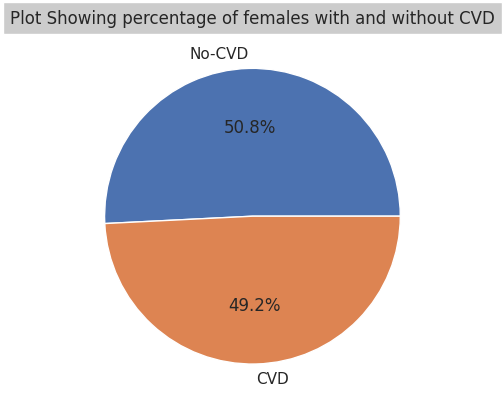

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 1)]),len(data[(data['cardio'] == 1) & (data['gender'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of females with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


Plot Showing percentage of males with and without CVD

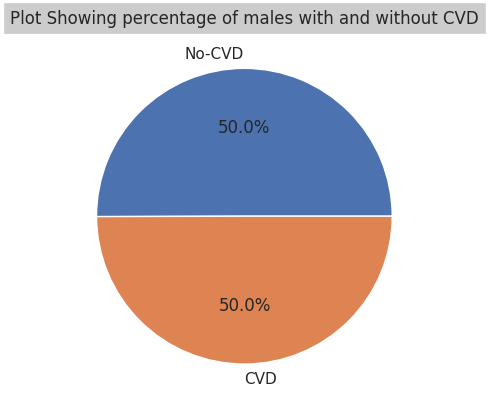

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gender'] == 2)]),len(data[(data['cardio'] == 1) & (data['gender'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of males with and without CVD",bbox={'facecolor':'0.8', 'pad':5})
plt.show()


# *Cholestrol*

% age of people with normal cholestrol,having CVD or not having CVD

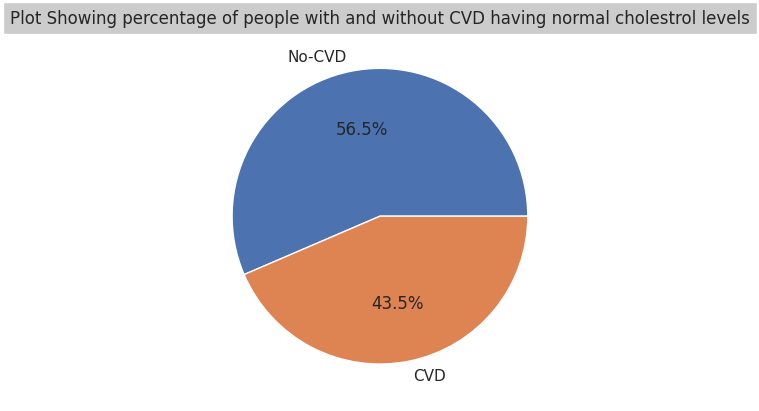

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 1)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal cholestrol,having CVD or not having CVD

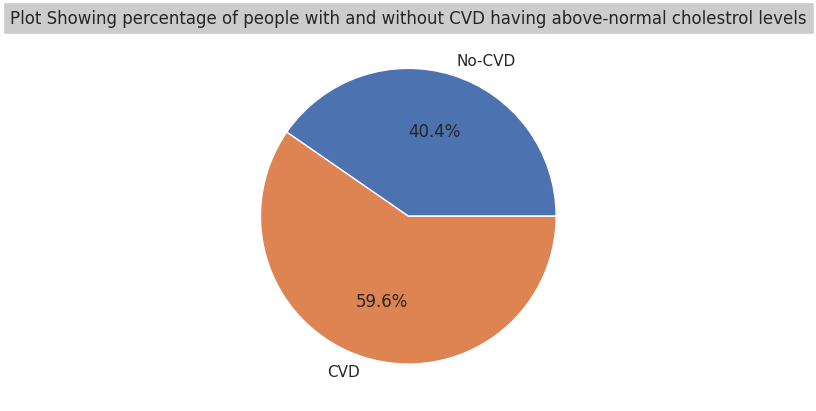

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 2)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal cholestrol,having CVD or not having CVD

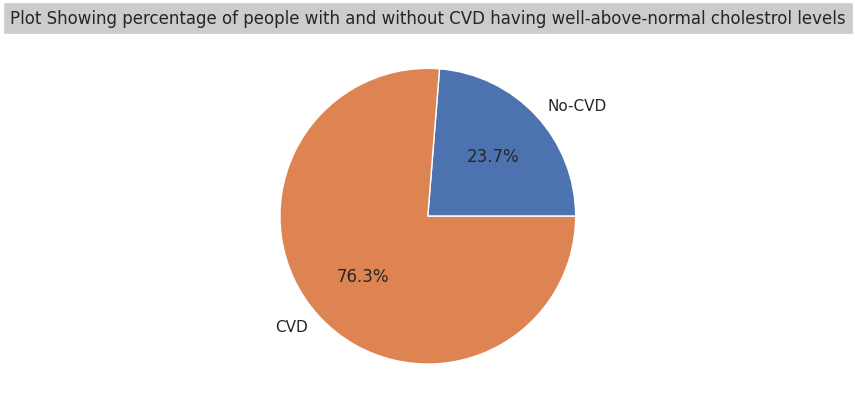

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['cholesterol'] == 3)]),len(data[(data['cardio'] == 1) & (data['cholesterol'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well-above-normal cholestrol levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Glucose*

% age of people with normal glucose,having CVD or not having CVD

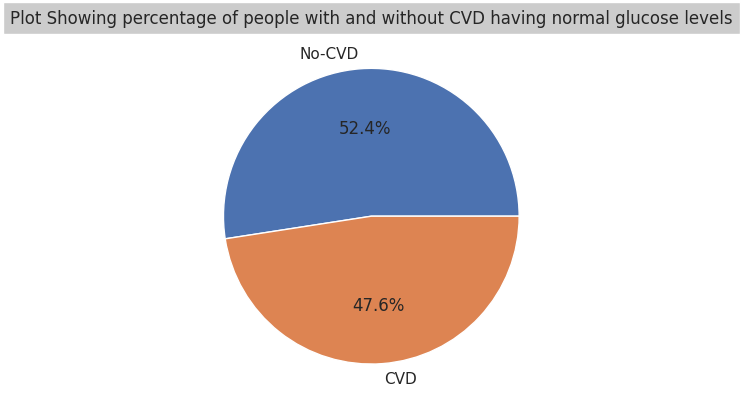

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 1)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with above-normal glucose,having CVD or not having CVD

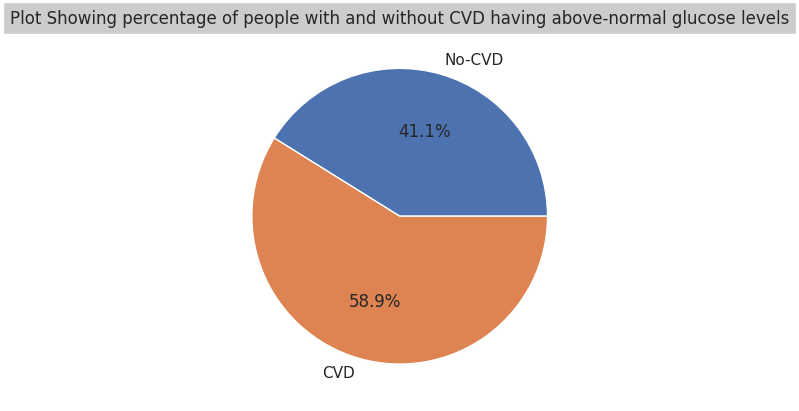

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 2)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 2)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having above-normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with well-above-normal glucose,having CVD or not having CVD

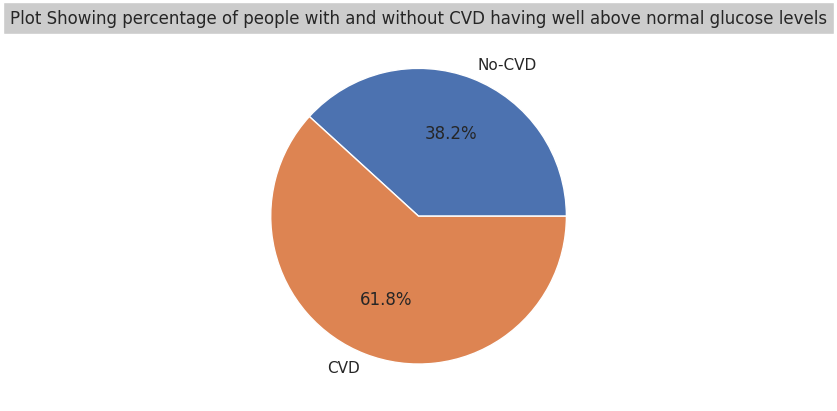

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['gluc'] == 3)]),len(data[(data['cardio'] == 1) & (data['gluc'] == 3)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having well above normal glucose levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# *Life-Style*

% age of people with lazy lifestyle,having CVD or not having CVD

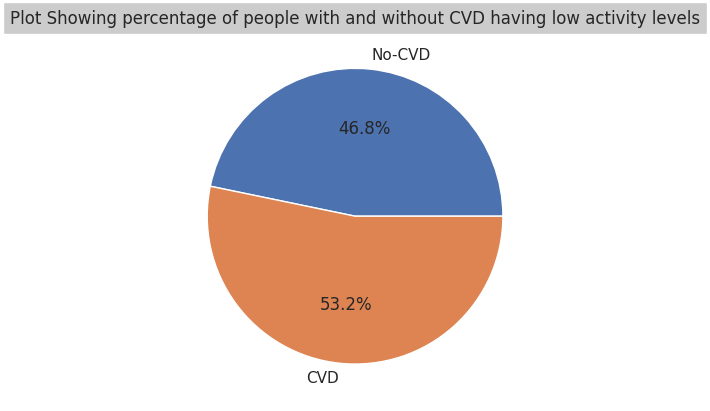

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 0)]),len(data[(data['cardio'] == 1) & (data['active'] == 0)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having low activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

% age of people with active lifestyle,having CVD or not having CVD

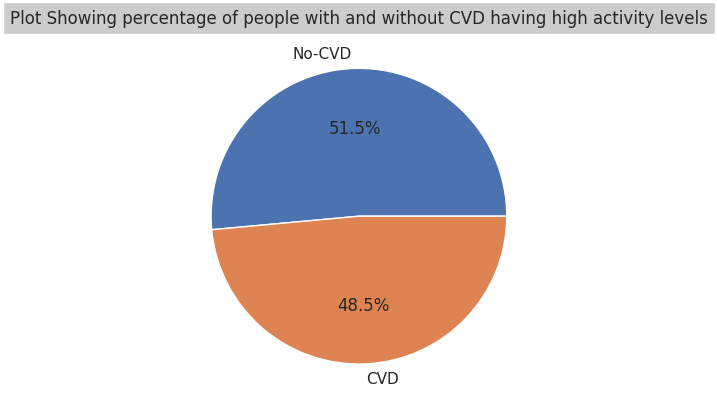

In [ ]:
CVD=["No-CVD","CVD"]
count_no_cvd = [len(data[(data['cardio'] == 0) & (data['active'] == 1)]),len(data[(data['cardio'] == 1) & (data['active'] == 1)])]
plt.pie(count_no_cvd,labels=CVD,autopct='%1.1f%%')
plt.title("Plot Showing percentage of people with and without CVD having high activity levels",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# **Analysis of the dataset**

**People with  no CVD**

In [ ]:
mask_0 = (data['cardio']==0)


print("People with no CVD")

# Various Factors for patients without CVD
age_max_no_cvd =  float(data.loc[mask_0,['age']].max())
age_min_no_cvd = float(data.loc[mask_0,['age']].min())
age_mean_no_cvd = float(data.loc[mask_0,['age']].mean())
age_median_no_cvd = float(data.loc[mask_0,['age']].median())

weight_max_no_cvd =  float(data.loc[mask_0,['weight']].max())
weight_min_no_cvd = float(data.loc[mask_0,['weight']].min())
weight_mean_no_cvd = float(data.loc[mask_0,['weight']].mean())
weight_median_no_cvd = float(data.loc[mask_0,['weight']].median())


sys_max_no_cvd =  float(data.loc[mask_0,['ap_hi']].max())
sys_min_no_cvd = float(data.loc[mask_0,['ap_hi']].min())
sys_mean_no_cvd = float(data.loc[mask_0,['ap_hi']].mean())
sys_median_no_cvd = float(data.loc[mask_0,['ap_hi']].median())


dys_max_no_cvd =  float(data.loc[mask_0,['ap_lo']].max())
dys_min_no_cvd = float(data.loc[mask_0,['ap_lo']].min())
dys_mean_no_cvd = float(data.loc[mask_0,['ap_lo']].mean())
dys_median_no_cvd = float(data.loc[mask_0,['ap_lo']].median())



pp_max_no_cvd =  float(data.loc[mask_0,['PP']].max())
pp_min_no_cvd = float(data.loc[mask_0,['PP']].min())
pp_mean_no_cvd = float(data.loc[mask_0,['PP']].mean())
pp_median_no_cvd = float(data.loc[mask_0,['PP']].median())



map_max_no_cvd =  float(data.loc[mask_0,['MAP']].max())
map_min_no_cvd = float(data.loc[mask_0,['MAP']].min())
map_mean_no_cvd = float(data.loc[mask_0,['MAP']].mean())
map_median_no_cvd = float(data.loc[mask_0,['MAP']].median())



data_no_cvd  =       [ ['Age',age_max_no_cvd,age_min_no_cvd,age_mean_no_cvd,age_median_no_cvd],
                       ['Weight',weight_max_no_cvd,weight_min_no_cvd,weight_mean_no_cvd,weight_median_no_cvd],
                       ['Systolic BP (ap_hi)',sys_max_no_cvd,sys_min_no_cvd,sys_mean_no_cvd,sys_median_no_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_no_cvd,dys_min_no_cvd,dys_mean_no_cvd,dys_median_no_cvd],
                       ['Pulse Pressure (PP)',pp_max_no_cvd,pp_min_no_cvd,pp_mean_no_cvd,pp_median_no_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_no_cvd,map_min_no_cvd,map_mean_no_cvd,map_median_no_cvd]
                     ]



analysis_df_no_cvd = pd.DataFrame(data_no_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_no_cvd

People with no CVD


Parameter           Max      Min          Mean  \
0                           Age  23678.000000  10798.0  18879.829969   
1                        Weight    200.000000     22.0     71.568767   
2           Systolic BP (ap_hi)    309.000000     12.0    119.603645   
3            Dystolic BP(ap_lo)    160.000000      0.0     78.068790   
4           Pulse Pressure (PP)    309.000000      0.0     41.534856   
5  Mean Arterial Pressure (MAP)    173.333333      4.0     91.913742   

         Median  
0  19005.000000  
1     70.000000  
2    120.000000  
3     80.000000  
4     40.000000  
5     93.333333

**People with CVD**

In [ ]:
mask_1 = (data['cardio']==1)


print("People with CVD")
# Various Factors for patients with CVD
age_max_cvd =  float(data.loc[mask_1,['age']].max())
age_min_cvd = float(data.loc[mask_1,['age']].min())
age_mean_cvd = float(data.loc[mask_1,['age']].mean())
age_median_cvd = float(data.loc[mask_1,['age']].median())

weight_max_cvd =  float(data.loc[mask_1,['weight']].max())
weight_min_cvd = float(data.loc[mask_1,['weight']].min())
weight_mean_cvd = float(data.loc[mask_1,['weight']].mean())
weight_median_cvd = float(data.loc[mask_1,['weight']].median())


sys_max_cvd =  float(data.loc[mask_1,['ap_hi']].max())
sys_min_cvd = float(data.loc[mask_1,['ap_hi']].min())
sys_mean_cvd = float(data.loc[mask_1,['ap_hi']].mean())
sys_median_cvd = float(data.loc[mask_1,['ap_hi']].median())


dys_max_cvd =  float(data.loc[mask_1,['ap_lo']].max())
dys_min_cvd = float(data.loc[mask_1,['ap_lo']].min())
dys_mean_cvd = float(data.loc[mask_1,['ap_lo']].mean())
dys_median_cvd = float(data.loc[mask_1,['ap_lo']].median())



pp_max_cvd =  float(data.loc[mask_1,['PP']].max())
pp_min_cvd = float(data.loc[mask_1,['PP']].min())
pp_mean_cvd = float(data.loc[mask_1,['PP']].mean())
pp_median_cvd = float(data.loc[mask_1,['PP']].median())



map_max_cvd =  float(data.loc[mask_1,['MAP']].max())
map_min_cvd = float(data.loc[mask_1,['MAP']].min())
map_mean_cvd = float(data.loc[mask_1,['MAP']].mean())
map_median_cvd = float(data.loc[mask_1,['MAP']].median())



data_cvd  =       [ ['Age',age_max_cvd,age_min_cvd,age_mean_cvd,age_median_cvd],
                       ['Weight',weight_max_cvd,weight_min_cvd,weight_mean_cvd,weight_median_cvd],
                       ['Systolic BP (ap_hi)',sys_max_cvd,sys_min_cvd,sys_mean_cvd,sys_median_cvd],
                       ['Dystolic BP(ap_lo)',dys_max_cvd,dys_min_cvd,dys_mean_cvd,dys_median_cvd],
                       ['Pulse Pressure (PP)',pp_max_cvd,pp_min_cvd,pp_mean_cvd,pp_median_cvd],
                       ['Mean Arterial Pressure (MAP)',map_max_cvd,map_min_cvd,map_mean_cvd,map_median_cvd]
                     ]



analysis_df_cvd = pd.DataFrame(data_cvd,columns = ['Parameter','Max','Min','Mean','Median'])
analysis_df_cvd

People with CVD


Parameter      Max      Min          Mean   Median
0                           Age  23713.0  14275.0  20061.317136  20387.5
1                        Weight    200.0     11.0     76.720184     75.0
2           Systolic BP (ap_hi)    401.0     16.0    133.895023    130.0
3            Dystolic BP(ap_lo)    182.0      0.0     84.510442     80.0
4           Pulse Pressure (PP)    321.0      0.0     49.384581     50.0
5  Mean Arterial Pressure (MAP)    187.0     12.0    100.971969    100.0

# Feature Extraction

# Outlier Detction and Cleaning

**Z-Score**

In [ ]:


# Function for Z-score outlier detection
def zscore_outlier(x, lb, ub):
    zscore = ((x - x.mean()) / x.std()).copy()
    result_ = pd.Series([0] * len(x),index=x.index)
    result_[(zscore < lb) | (zscore > ub)] = 1
    return result_

def zscore_function(data):

  # Assuming 'data' is your DataFrame

  # PLOTTING A SCATTER PLOT AND HIGHLIGHTING THE OUTLIERS DETECTED BY Z-SCORE METHOD
  num_columns = len(data.columns)
  num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed

  fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))
  row = col = 0

  # Create a new DataFrame to store the filtered data
  filtered_data = data.copy()

  for n, i in enumerate(data.columns):
      if (n % 2 == 0) and (n > 0):
          row += 1
          col = 0
      outliers = zscore_outlier(data[i], -2.75, 2.75)

      # Remove outliers from the DataFrame
      filtered_data[i] = np.where(outliers == 1, np.nan, data[i])

      if sum(outliers) == 0:
          sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], legend=False, color='green')
      else:
          sns.scatterplot(x=np.arange(len(data[i])), y=data[i], ax=ax[row, col], hue=outliers, palette=['green', 'red'])
      for x, y in zip(np.arange(len(data[i]))[outliers == 1], data[i][outliers == 1]):
          ax[row, col].text(x=x, y=y, s=y, fontsize=8)
      ax[row, col].set_ylabel("")
      ax[row, col].set_title(i)
      ax[row, col].xaxis.set_visible(False)
      if sum(outliers) > 0:
          ax[row, col].legend(ncol=2)
      col += 1

  # Remove unused subplots
  for r in range(row+1, num_rows):
      for c in range(2):
          ax[r, c].axis('off')

  plt.show()
  filtered_data = filtered_data.dropna()
  return filtered_data



## `**LOF**`

In [ ]:
data_lof = data.copy(deep=True)
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.20)
outlier_scores = lof.fit_predict(data_lof)


data_lof["LOF_Score"] = outlier_scores
data_lof = data_lof[data_lof["LOF_Score"]>=0]
data_lof.drop(columns=['LOF_Score'],inplace=True)
display(data_lof)

<ipython-input-11-639b86638c56>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lof.drop(columns=['LOF_Score'],inplace=True)


age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
5      21914       1     151    67.0    120     80            2     2      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  19699       1     172    70.0    130     90            1     1      0   
69994  21074       1     165    80.0    150     80            1     1      0   
69995  19240       2     168    76.0    120     80            1     1      1   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  PP         MAP  cardio  
1         0       1  50  106.666667       1  
2         0       0  60   90.000000       1  
3         0       1  50  116.666667       1  
4         0       0  40   73.333333       0  
5         0       0  40   93.333333       0  
...     ...     ...  ..         ...     ...  
69993     0       1  40  103.333333       1  
69994     0       1  70  103.333333       1  
69995     0       1  40   93.333333       0  
69998     0       0  55   98.333333       1  
69999     0       1  40   93.333333       0  

[54981 rows x 14 columns]

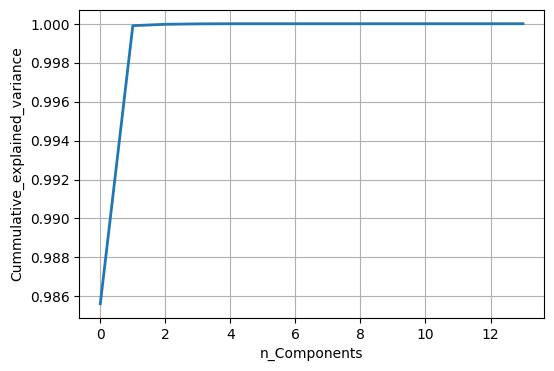

In [ ]:
pca = PCA()
pca.n_components = 14
pca_data  = pca.fit_transform(data_lof)


percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_Components')
plt.ylabel('Cummulative_explained_variance')
plt.show()


**t-SNE seprability visualization**

In [ ]:
def tsne_vis(data):
    data2 = data.copy(deep=True)
    X=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    tsne = TSNE(n_components=2, n_iter = 1000, perplexity = 300, random_state=42)
    # Fit and transform your data to the lower-dimensional space
    X_tsne = tsne.fit_transform(X)

    # Now, X_tsne contains the lower-dimensional representation of your data

    # Visualize the t-SNE results (scatter plot)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)  # Assuming 'y' is your target variable for coloring points
    plt.title("t-SNE Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

## **Models**

**Generic Codes**


*One_hot_encoding*

In [ ]:
def one_hot_encoding(data):
  data2 = data.copy(deep=True)
  categorical_columns = ['gender','cholesterol','gluc','smoke','alco','active']
  data2 = pd.get_dummies(data, columns=categorical_columns,drop_first=True)
  temp=data2.pop('cardio')
  data2['cardio']=temp
  return data2

*K-fold on PCA*

In [ ]:
def find_optimal_pca_components(X_train,Y_train,model):
    n_components = list(range(1, X_train.shape[1] + 1))
    pca = PCA()
    # Create a pipeline with PCA and the classifier
    pipeline = Pipeline([
        ('pca', PCA()),
        ('model', model)
    ])

    # Define the grid of parameters to search over
    param_grid = {
        'pca__n_components': n_components,
    }

    grid_search = GridSearchCV(pipeline, param_grid,verbose=1,cv=10)

    grid_search.fit(X_train, Y_train)

    print(f'Optimal number of components: {grid_search.best_params_["pca__n_components"]}')
    print(f'Cross-validation score: {grid_search.best_score_}')
    return (grid_search.best_params_["pca__n_components"],grid_search.best_score_)

*Train-Test-Split (normal data)*

In [ ]:
def find_train_test_split(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,2,3,4,5,11,12])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

Train-Test-Split (Test Data)

In [ ]:
def find_train_test_split2(data,test_size):
  data2=data.copy(deep=True)
  X=data.iloc[:,:-1]
  y=data.iloc[:,-1]
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=10)
  ct = ColumnTransformer([('x', StandardScaler(),[0,1,2,3,4,5,6])], remainder ='passthrough')
  X_train = ct.fit_transform(X_train)
  X_test = ct.transform(X_test)
  return (X_train,X_test,Y_train,Y_test)

*Naive Bayes*

In [ ]:
def naive_bayes(X_train,X_test,y_train,y_test):


# Create and train the Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gnb.predict(X_test)
    y_pred_train = gnb.predict(X_train)

    accuracy = metrics.accuracy_score(y_train, y_pred_train)
    recall = metrics.recall_score(y_train,y_pred_train)
    f1 = metrics.f1_score(y_train,y_pred_train)
    precision = metrics.precision_score(y_train,y_pred_train)
    print("-----------------Training Data Metrics : --------------------------------")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("f1:", f1)
    print("Precision:", precision)
    print("Confusion Matrix : ")
    print(metrics.confusion_matrix(y_pred_train,y_train))
    print()
    # Evaluate the model
    print("-------------------Testing Data Metrics-------------------")
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    print("Confusion Matrix : ")
    print(metrics.confusion_matrix(y_pred,y_test))

    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("f1:", f1)
    print("Precision:", precision)


*ROC Curve*

In [ ]:
def plot_roc(X_train,X_test,Y_Train,Y_Test,model):
  model.fit(X_train,Y_train)
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr,tpr,threshold = metrics.roc_curve(Y_test,y_pred_proba)
  plt.plot(fpr,tpr)
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.title("ROC Curve")
  plt.show()

*Logistic Regression*

In [ ]:
def logistic_regression(X_Train,X_Test,Y_Train,Y_Test,threshold_probability):
  model = LogisticRegression()
  model.fit(X_train,Y_train)
  probs_train = model.predict_proba(X_train)
  y_predict_train = (probs_train[:,1]>=threshold_probability).astype('int')

  probs_test = model.predict_proba(X_test)
  y_predict_test = (probs_test[:,1]>=threshold_probability).astype('int')

  print("---------------Training Data Metrics-----------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_train,Y_train))
  print("Precision = ",metrics.precision_score(y_predict_train,Y_train))
  print("Recall = ",metrics.recall_score(y_predict_train,Y_train))
  print("F1 Score = ",metrics.f1_score(y_predict_train,Y_train))

  print(metrics.confusion_matrix(y_predict_train,Y_train))


  print("-------------------------Testing Data Metrics---------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_test,Y_test))
  print("Precision = ",metrics.precision_score(y_predict_test,Y_test))
  print("Recall = ",metrics.recall_score(y_predict_test,Y_test))
  print("F1 Score = ",metrics.f1_score(y_predict_test,Y_test))

  print(metrics.confusion_matrix(y_predict_test,Y_test))

*PCA*

In [ ]:
def find_pca(X_train,X_test,Y_train,Y_test,model):
  pca = PCA()
  pca.n_components=find_optimal_pca_components(X_train,Y_train,model)[0]
  pca.fit(X_train)
  X_train_pca = pca.transform(X_train)
  X_test_pca = pca.transform(X_test)
  return (X_train_pca,X_test_pca,Y_train,Y_test)

SVM

In [ ]:
def SVM_generic(X_train,X_test,y_train,y_test,_kernel):
  # target_column = 'cardio'

  # svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.
  svm_model = SVC(kernel=_kernel)
  svm_model.fit(X_train, y_train)
  y_predict_test = svm_model.predict(X_test)
  y_predict_train = svm_model.predict(X_train)


  print("---------------Training Data Metrics-----------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_train,y_predict_train))
  print("Precision = ",metrics.precision_score(y_predict_train,y_train))
  print("Recall = ",metrics.recall_score(y_predict_train,y_train))
  print("F1 Score = ",metrics.f1_score(y_predict_train,y_train))

  print(metrics.confusion_matrix(y_predict_train,y_train))


  print("-------------------------Testing Data Metrics---------------------")
  print("Accuracy  = ",metrics.accuracy_score(y_predict_test,y_test))
  print("Precision = ",metrics.precision_score(y_predict_test,y_test))
  print("Recall = ",metrics.recall_score(y_predict_test,y_test))
  print("F1 Score = ",metrics.f1_score(y_predict_test,y_test))

  print(metrics.confusion_matrix(y_predict_test,y_test))

**Naive Bayes**

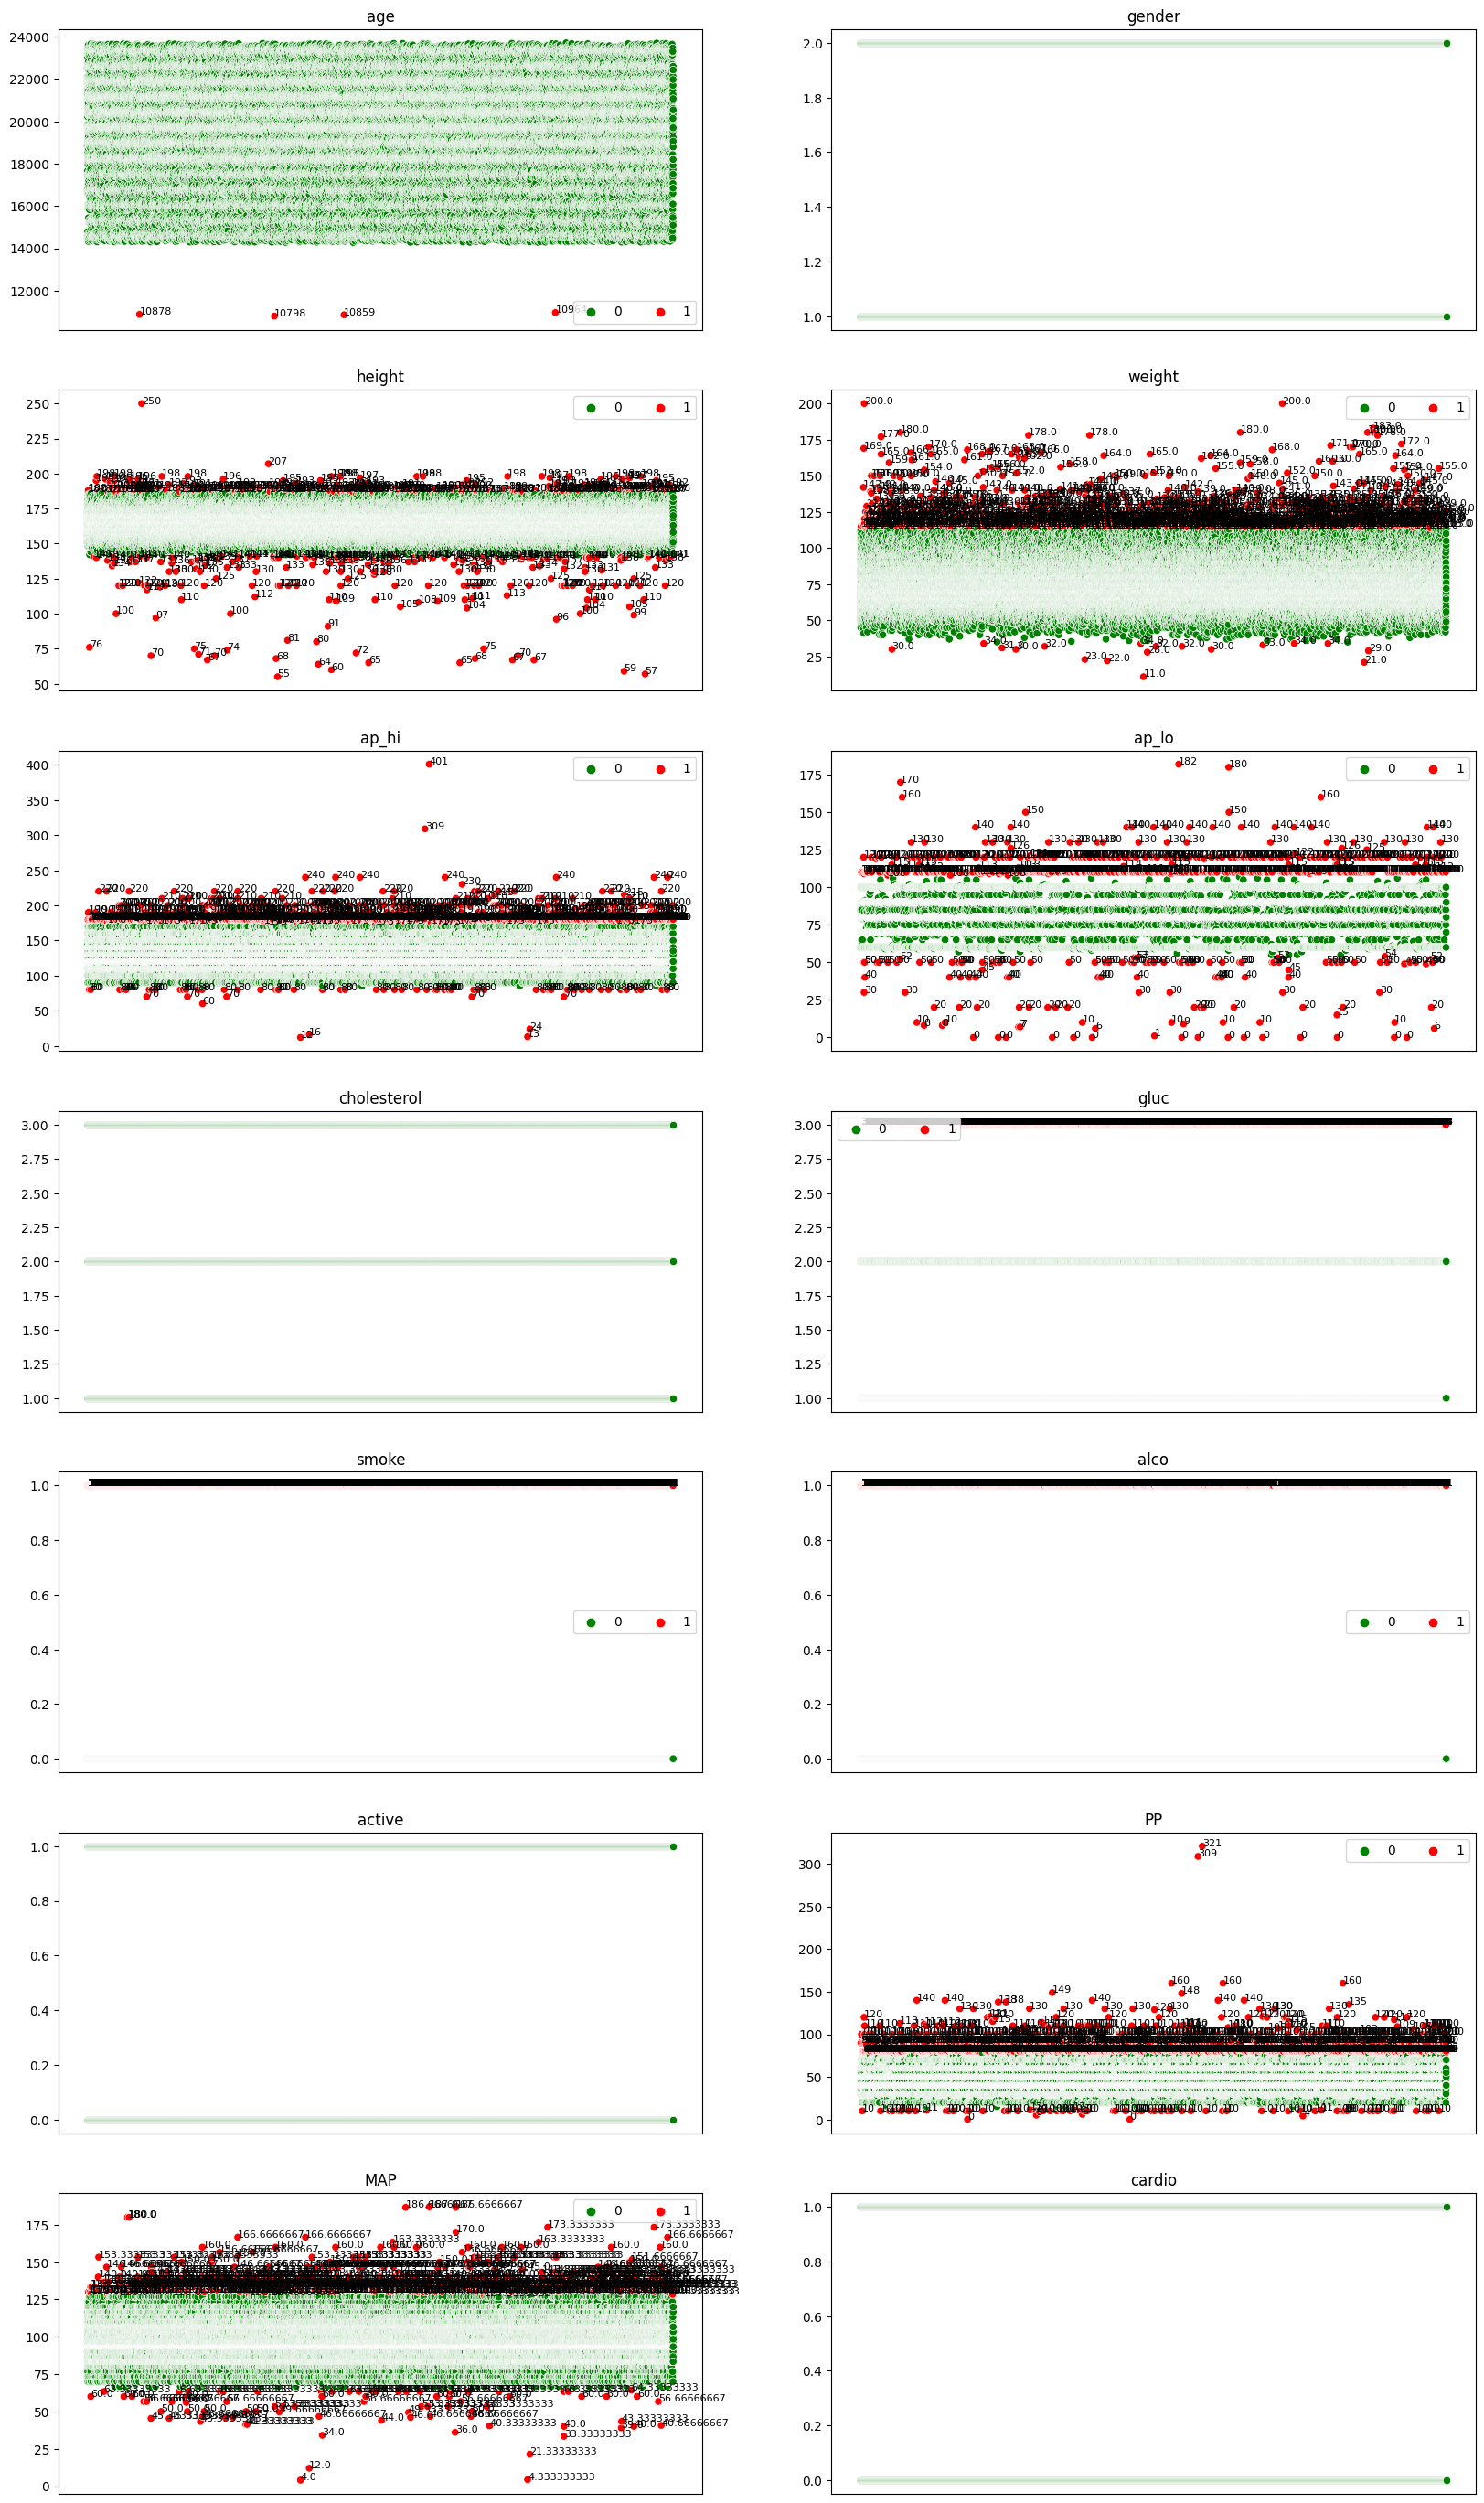

In [ ]:
data_zscore = zscore_function(data)

*Z-Score*

Standerdized Data

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7198693580339455
Recall: 0.5957038958110166
f1: 0.6688188378275731
Precision: 0.762392669023739
Confusion Matrix : 
[[16324  7171]
 [ 3293 10566]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[7011 3074]
 [1467 4458]]
Accuracy: 0.716364772017489
Recall: 0.5918746680828465
f1: 0.6625548041911273
Precision: 0.7524050632911392


Standardized Data + One Hot

In [ ]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7182898752476308
Recall: 0.5680216496589051
f1: 0.6569295471587391
Precision: 0.7788342609771182
Confusion Matrix : 
[[16756  7662]
 [ 2861 10075]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[7215 3295]
 [1263 4237]]
Accuracy: 0.7153029356652092
Recall: 0.5625331917153479
f1: 0.6502455494168201
Precision: 0.7703636363636364


Standerdized Data + One Hot + PCA

In [ ]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
naive_bayes(X_train,X_test,Y_train,Y_test)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Optimal number of components: 3
Cross-validation score: 0.7127751906985544
-----------------Training Data Metrics : --------------------------------
Accuracy: 0.712775070942871
Recall: 0.5677961323786435
f1: 0.6524569984775356
Precision: 0.7667884878940155
Confusion Matrix : 
[[16554  7666]
 [ 3063 10071]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[7132 3176]
 [1346 4356]]
Accuracy: 0.7175515302935666
Recall: 0.5783324482209241
f1: 0.6583043675381594
Precision: 0.7639424763240968


*LOF*

Standerdized Data

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

-----------------Training Data Metrics : --------------------------------
Accuracy: 0.729486046874188
Recall: 0.6439107706640443
f1: 0.705012325390304
Precision: 0.7789256198347108
Confusion Matrix : 
[[15634  6880]
 [ 3531 12441]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6541 2988]
 [1552 5414]]
Accuracy: 0.724765080327372
Recall: 0.6443703880028565
f1: 0.704580947423217
Precision: 0.7772035601492966


Standerdized + One Hot Encoded Data

In [ ]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
naive_bayes(X_train,X_test,Y_train,Y_test)

-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7256145091721665
Recall: 0.6413229128927074
f1: 0.7012053647218606
Precision: 0.7734223831221522
Confusion Matrix : 
[[15535  6930]
 [ 3630 12391]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6517 3026]
 [1576 5376]]
Accuracy: 0.7210063655653228
Recall: 0.6398476553201619
f1: 0.7002735443532629
Precision: 0.7733026467203682


Standerdized + One Hot Encoded Data + PCA

In [ ]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,GaussianNB())
naive_bayes(X_train,X_test,Y_train,Y_test)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Optimal number of components: 5
Cross-validation score: 0.7202104159138455
-----------------Training Data Metrics : --------------------------------
Accuracy: 0.7208595333367978
Recall: 0.6477925573210497
f1: 0.699706498951782
Precision: 0.7606660994287103
Confusion Matrix : 
[[15227  6805]
 [ 3938 12516]]

-------------------Testing Data Metrics-------------------
Confusion Matrix : 
[[6372 2953]
 [1721 5449]]
Accuracy: 0.7166414064868142
Recall: 0.6485360628421805
f1: 0.6998458772155149
Precision: 0.7599721059972105


**Logistic Regression**

*Z-Score*

Plotting ROC Curve

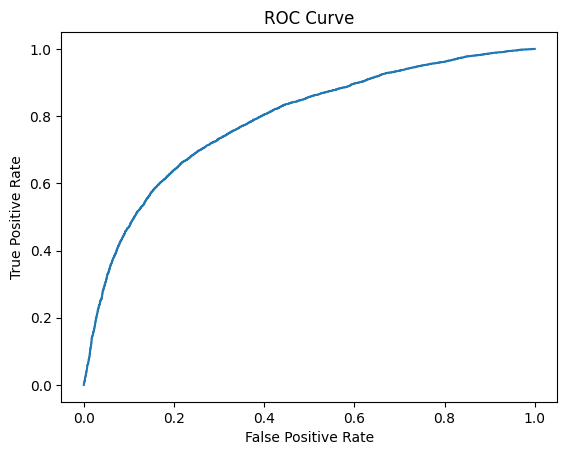

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
plot_roc(X_train,X_test,Y_train,Y_test,LogisticRegression())

Standerdized Data

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

---------------Training Data Metrics-----------------------
Accuracy  =  0.7236440541842908
Precision =  0.63071545357163
Recall =  0.7477941176470588
F1 Score =  0.6842829617396091
[[15844  6550]
 [ 3773 11187]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7242348532167395
Precision =  0.6347583643122676
Recall =  0.7418153607447634
F1 Score =  0.6841239178650641
[[6814 2751]
 [1664 4781]]


Standerdized + One Hot Encoded Data

In [ ]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

---------------Training Data Metrics-----------------------
Accuracy  =  0.7244471810247899
Precision =  0.628460280769014
Recall =  0.7506397306397307
F1 Score =  0.6841378463804585
[[15914  6590]
 [ 3703 11147]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7256089943785134
Precision =  0.6330323951141795
Recall =  0.7453493825230577
F1 Score =  0.6846148323641323
[[6849 2764]
 [1629 4768]]


Standerdized + One Hot + PCA

In [ ]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,LogisticRegression())
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Optimal number of components: 10
Cross-validation score: 0.7244473325134944
---------------Training Data Metrics-----------------------
Accuracy  =  0.7244471810247899
Precision =  0.628460280769014
Recall =  0.7506397306397307
F1 Score =  0.6841378463804585
[[15914  6590]
 [ 3703 11147]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7256089943785134
Precision =  0.6330323951141795
Recall =  0.7453493825230577
F1 Score =  0.6846148323641323
[[6849 2764]
 [1629 4768]]


*LOF*

Plotting ROC Curve

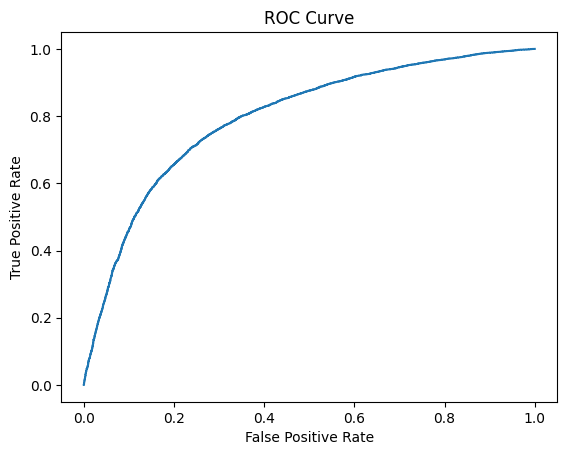

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
plot_roc(X_train,X_test,Y_train,Y_test,LogisticRegression())

Standerdized Data

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

---------------Training Data Metrics-----------------------
Accuracy  =  0.7331497167801279
Precision =  0.6858858237151286
Recall =  0.7592963960350656
F1 Score =  0.7207266003154402
[[14964  6069]
 [ 4201 13252]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7293119127008184
Precision =  0.6793620566531778
Recall =  0.7632036368498463
F1 Score =  0.718846420250614
[[6322 2694]
 [1771 5708]]


Standarderdized Data + One Hot Encoded Data

In [ ]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

---------------Training Data Metrics-----------------------
Accuracy  =  0.7345268409291691
Precision =  0.6858340665597019
Recall =  0.7616392688814806
F1 Score =  0.7217516816906779
[[15018  6070]
 [ 4147 13251]]
-------------------------Testing Data Metrics---------------------
Accuracy  =  0.7302212791755077
Precision =  0.679838133777672
Recall =  0.7644539614561028
F1 Score =  0.7196673806224014
[[6333 2690]
 [1760 5712]]


Standerdized + One Hot Encoded Data + PCA

In [ ]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,LogisticRegression())
logistic_regression(X_train,X_test,Y_train,Y_test,0.5)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


**Support Vector Machine**


*Z-Score*

Standardized Data

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_zscore,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

Standarderdized Data + One Hot Encoded

In [ ]:
data_zscore_one_hot = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

Standarderdized Data + One Hot Encoded + PCA

In [ ]:
data_zscore_one_hot_pca = one_hot_encoding(data_zscore)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_zscore_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,SVC(kernel='rbf'))
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

*LOF*

Standerdized Data

In [ ]:
X_train,X_test,Y_train,Y_test = find_train_test_split(data_lof,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

Standarderdized Data + One Hot Encoded

In [ ]:
data_lof_one_hot = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot,0.3)
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')

Standerdized Data + One Hot Encoded + PCA

In [ ]:
data_lof_one_hot_pca = one_hot_encoding(data_lof)
X_train,X_test,Y_train,Y_test = find_train_test_split2(data_lof_one_hot_pca,0.3)
X_train,X_test,Y_train,Y_test  = find_pca(X_train,X_test,Y_train,Y_test,SVC(kernel='rbf'))
SVM_generic(X_train,X_test,Y_train,Y_test,'rbf')